In [173]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline

In [174]:
#Function to populate the data files for feeding into the ML model.  It takes in the path
#to the music directory, the file name of the data file, and the encoding -- whether
#the song is classified as good (1) or bad (0)
def fill_file(music_dir, filename, encoding):
    num_songs = len(os.listdir(music_dir))
    song_count = 1
    for song in os.listdir(music_dir):
        songname = f'{music_dir}/{song}'
        print(f'Working on song {songname} from {music_dir}.  Song {song_count} out of {num_songs}')
        song_count += 1
        
#The features extracted from the songs using the Librosa package
        y, sr = librosa.load(songname)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rms = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        row = f'{np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}' 

        for feature in mfcc:
            row += f' {np.mean(feature)}'
            
        if encoding == 1:
            row += f' 1'
        elif encoding == 0:
            row += f' 0'
        
        file = open(filename, 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(row.split())

In [175]:
#Specify the directories for the music
good_music_dir = '/home/fernando/Music/Good'
bad_music_dir = '/home/fernando/Music/Bad'

In [176]:
#Create the header that will identify the columns in our data files
header = 'chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

#Open the data file that will contain the classified good and bad music
file = open('data.csv', 'w', newline = '')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
    
#Call the 'fill_file' function to populate the data files
fill_file(good_music_dir, 'data.csv', 1)
fill_file(bad_music_dir, 'data.csv', 0)

Working on song /home/fernando/Music/Good/Anonymous420_-_03_-_Echo_Blues_Effect.mp3 from /home/fernando/Music/Good.  Song 1 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Anonymous420_-_05_-___.mp3 from /home/fernando/Music/Good.  Song 2 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Anonymous420_-_29_-_.mp3 from /home/fernando/Music/Good.  Song 3 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Dancefloor_is_Lava_-_04_-_Why_Oh_You_Are_L_O_V_E.mp3 from /home/fernando/Music/Good.  Song 4 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Frederic_Lardon_-_05_-_Il_me_faut_du_fric.mp3 from /home/fernando/Music/Good.  Song 5 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Frederic_Lardon_-_08_-_Skittles.mp3 from /home/fernando/Music/Good.  Song 6 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Frederic_Lardon_-_09_-_Gros_poisson_trop_moche.mp3 from /home/fernando/Music/Good.  Song 7 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Komiku_-_04_-_Car_chasing_pew_pew.mp3 from /home/fernando/Music/Good.  Song 8 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Komiku_-_08_-_Surfing.mp3 from /home/fernando/Music/Good.  Song 9 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Komiku_-_32_-_Boss_2_-_Too_powerful_for_you_run_.mp3 from /home/fernando/Music/Good.  Song 10 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Komiku_-_35_-_The_True_Last_Boss.mp3 from /home/fernando/Music/Good.  Song 11 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Loyalty_Freak_Music_-_03_-_IM_ON_FIRE.mp3 from /home/fernando/Music/Good.  Song 12 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Loyalty_Freak_Music_-_03_-_MEGA_METAL.mp3 from /home/fernando/Music/Good.  Song 13 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Loyalty_Freak_Music_-_05_-_EXTRA_METAL.mp3 from /home/fernando/Music/Good.  Song 14 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Loyalty_Freak_Music_-_05_-_Grab_A_Partner.mp3 from /home/fernando/Music/Good.  Song 15 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Loyalty_Freak_Music_-_06_-_Everyone.mp3 from /home/fernando/Music/Good.  Song 16 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Loyalty_Freak_Music_-_06_-_SUPER_METAL.mp3 from /home/fernando/Music/Good.  Song 17 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Loyalty_Freak_Music_-_07_-_GIGA_METAL.mp3 from /home/fernando/Music/Good.  Song 18 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Loyalty_Freak_Music_-_08_-_Last_Energy_For_The_Day (1).mp3 from /home/fernando/Music/Good.  Song 19 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Loyalty_Freak_Music_-_08_-_Last_Energy_For_The_Day.mp3 from /home/fernando/Music/Good.  Song 20 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Loyalty_Freak_Music_-_08_-_ULTIMATE_METAL.mp3 from /home/fernando/Music/Good.  Song 21 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Loyalty_Freak_Music_-_10_-_Everyone_is_so_alive.mp3 from /home/fernando/Music/Good.  Song 22 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Loyalty_Freak_Music_-_31_-_Coexistenz.mp3 from /home/fernando/Music/Good.  Song 23 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Monplaisir_-_03_-_Sane.mp3 from /home/fernando/Music/Good.  Song 24 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Monplaisir_-_04_-_12_One_Two.mp3 from /home/fernando/Music/Good.  Song 25 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Monplaisir_-_04_-_Aimer_cest_ce_quil_y_a_de_plus_beau.mp3 from /home/fernando/Music/Good.  Song 26 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Monplaisir_-_04_-_Old_battle_theme_1.mp3 from /home/fernando/Music/Good.  Song 27 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Monplaisir_-_05_-_IF.mp3 from /home/fernando/Music/Good.  Song 28 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Monplaisir_-_06_-_Je_voudrais_tre_un_pigeon.mp3 from /home/fernando/Music/Good.  Song 29 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Monplaisir_-_06_-_Meh.mp3 from /home/fernando/Music/Good.  Song 30 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Monplaisir_-_07_-_Delicate.mp3 from /home/fernando/Music/Good.  Song 31 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Monplaisir_-_08_-_On_est_bien_l.mp3 from /home/fernando/Music/Good.  Song 32 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Monplaisir_-_08_-_The_void_is_never_so_far.mp3 from /home/fernando/Music/Good.  Song 33 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Monplaisir_-_09_-_au.mp3 from /home/fernando/Music/Good.  Song 34 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Monplaisir_-_11_-_66666666666666666666_66666666666666666666_66666666666666666666_66666666666666666666_66666666666666666666_66666666666666666666.mp3 from /home/fernando/Music/Good.  Song 35 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Monplaisir_-_18_-_Ending_2.mp3 from /home/fernando/Music/Good.  Song 36 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Soft_and_Furious_-_12_-_Youre_Magic.mp3 from /home/fernando/Music/Good.  Song 37 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Soft_and_Furious_-_18_-_Shining_Ending.mp3 from /home/fernando/Music/Good.  Song 38 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Soft_and_Furious_-_39_-_The_Merfolk_I_Should_Turn_To_Be.mp3 from /home/fernando/Music/Good.  Song 39 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/Tequila_Moonrise_-_09_-_Tequila_Moonrise.mp3 from /home/fernando/Music/Good.  Song 40 out of 40


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/Anonymous420_-_01_-_Welcome_to_Nostalgia.mp3 from /home/fernando/Music/Bad.  Song 1 out of 19


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/Anonymous420_-_04_-_Buy_a_multitap_to_jam_with_some_friends.mp3 from /home/fernando/Music/Bad.  Song 2 out of 19


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/Anonymous420_-_05_-_Echo_Blues_Effect.mp3 from /home/fernando/Music/Bad.  Song 3 out of 19


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/Anonymous420_-_08_-_O_X_L2_X_-_O_R1.mp3 from /home/fernando/Music/Bad.  Song 4 out of 19


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/Anonymous420_-_09_-_Ok_now_Im_bored_bye_.mp3 from /home/fernando/Music/Bad.  Song 5 out of 19


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/Demoiselle_Dner_-_18_-_Soulagement.mp3 from /home/fernando/Music/Bad.  Song 6 out of 19


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/Loyalty_Freak_Music_-_01_-_Sunglasses.mp3 from /home/fernando/Music/Bad.  Song 7 out of 19


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/Loyalty_Freak_Music_-_02_-_Friend_to_friend.mp3 from /home/fernando/Music/Bad.  Song 8 out of 19


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/Loyalty_Freak_Music_-_03_-_Sensual_Melancholia.mp3 from /home/fernando/Music/Bad.  Song 9 out of 19


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/Loyalty_Freak_Music_-_04_-_Dirty_shoes_blues.mp3 from /home/fernando/Music/Bad.  Song 10 out of 19


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/Loyalty_Freak_Music_-_05_-_The_candle.mp3 from /home/fernando/Music/Bad.  Song 11 out of 19


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/Loyalty_Freak_Music_-_06_-_Talk_to_me.mp3 from /home/fernando/Music/Bad.  Song 12 out of 19


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/Loyalty_Freak_Music_-_07_-_Dont_listen_to_the_words_they_say.mp3 from /home/fernando/Music/Bad.  Song 13 out of 19


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/Loyalty_Freak_Music_-_08_-_I_care.mp3 from /home/fernando/Music/Bad.  Song 14 out of 19


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/Loyalty_Freak_Music_-_15_-_Walking_Shoes.mp3 from /home/fernando/Music/Bad.  Song 15 out of 19


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/Loyalty_Freak_Music_-_17_-_Summer_Pride.mp3 from /home/fernando/Music/Bad.  Song 16 out of 19


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/Rafael_Archangel_-_07_-_Machine_-_174bpm.mp3 from /home/fernando/Music/Bad.  Song 17 out of 19


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/Rafael_Archangel_-_09_-_Wanted_-_170bpm.mp3 from /home/fernando/Music/Bad.  Song 18 out of 19


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/TRG_Banks_-_Grandpas_great_escape.mp3 from /home/fernando/Music/Bad.  Song 19 out of 19


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [177]:
#Read the data from the csv files and convert it into a pandas data frame
data = pd.read_csv('data.csv')

In [178]:
#This encodes the data.  This is not strictly necessary, since the songs are already classified
#with 1's and 0's, but the encodings are transformed into a convenient format to feed to the model
good_bad = data.iloc[:, -1]
encoder = LabelEncoder()
ymodel_data = encoder.fit_transform(good_bad)
print(ymodel_data)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [179]:
#The data is scaled, and also the data used to train the model is split into training
#and validation data sets
scaler = StandardScaler()
xmodel_data = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
x_train, x_test, y_train, y_test = train_test_split(xmodel_data, ymodel_data, test_size = 0.2)

In [180]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, LSTM, Lambda
from tensorflow.python.keras.callbacks import LambdaCallback
from tensorflow.python.keras.regularizers import l2
import tensorflow as tf

In [206]:
#The model is defined.  I use weighted and dropout regularization to avoid over-fitting.
model = Sequential()
model.add(Dense(256, activation = 'relu', input_shape = (x_train.shape[1],), kernel_regularizer = l2(0.001)))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_180 (Dense)            (None, 256)               6912      
_________________________________________________________________
dense_181 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_45 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_182 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_183 (Dense)            (None, 1)                 65        
Total params: 48,129
Trainable params: 48,129
Non-trainable params: 0
_________________________________________________________________


In [207]:
#Create the model
simple_log = LambdaCallback(on_epoch_end = lambda e, l: print(e, end = '.'))
E = 20

h = model.fit(
    x_train, y_train,
    epochs = E,
    validation_data = (x_test, y_test),
    callbacks = [simple_log],
    verbose = False)

0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

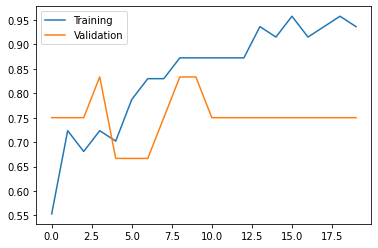

In [208]:
#Plot showing the accuracy and validation accuracy across epochs
plt.plot(range(E), h.history['accuracy'], label = 'Training')
plt.plot(range(E), h.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.show()

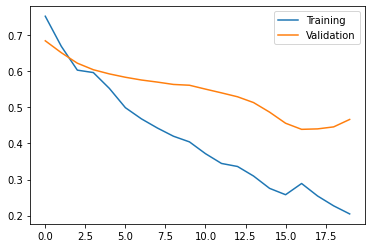

In [209]:
#Plot showing the loss and validation loss across epochs
plt.plot(range(E), h.history['loss'], label = 'Training')
plt.plot(range(E), h.history['val_loss'], label = 'Validation')
plt.legend()
plt.show()